In [1]:
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Datasets/height-weight.csv')
print(df.head())

   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


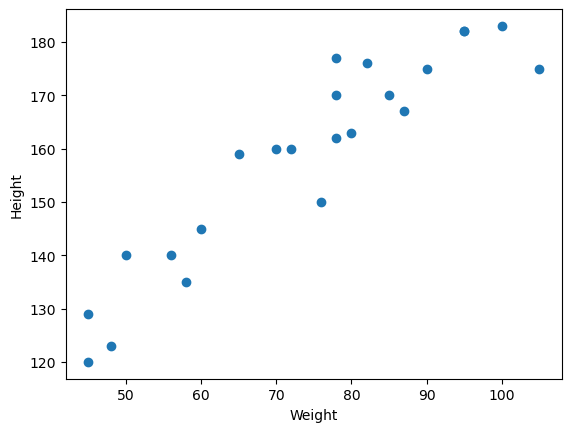

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')
plt.show()
df.corr()

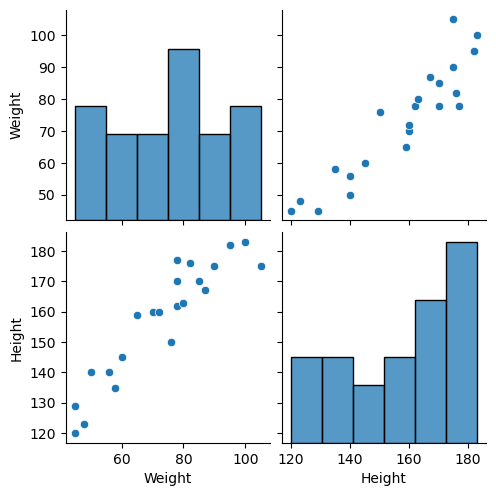

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
X1=df['Weight']
print(X1,type(X1))  #you get a series

#but I want my independent features to be a dataframe or a 2d array and not a series
X=df[['Weight']]  #put [[]]
print(X,type(X))
print(np.array(X).shape)   #you can also try to see shape of 2d array

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64 <class 'pandas.core.series.Series'>
    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72 <class 'pandas.core.frame.DataFrame'>
(23, 1)


In [8]:
#Independent Variable
y=df['Height']    #this can be of form series or 1d array
np.array(y).shape

(23,)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X_train.shape


(17, 1)

In [19]:
#Standardisation using z score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

print(X_test)

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [20]:
#Simple linear regression
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)  #n_jobs tells how many cores should work on this, -1 means all of them

regression.fit(X_train,y_train)
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [22]:
regression.coef_     #depends upon number of input features
print("coeff or slope:",regression.coef_)
print("intercept:",regression.intercept_)

coeff or slope: [17.2982057]
intercept: 156.47058823529412


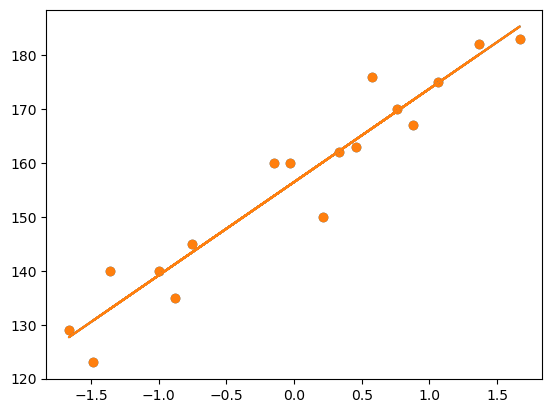

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [26]:
#prediction for test data
y_pred=regression.predict(X_test)

In [30]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(mse," ",mae," ",rmse," ",score)

114.84069295228699   9.665125886795005   10.716374991212605   0.7360826717981276


In [32]:
#predicting for new value
regression.predict(scaler.transform([[72]]))

d:\Miniconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])